
[![My Image](https://raw.githubusercontent.com/kjcook13/AMIGAS_2023/main/images/IPAMlogo.png)](https://raw.githubusercontent.com/username/repository/main/image.png)


# **Data Driven Mathematical Models and Simulation Techniques**

**Instructor:** Dr. Keisha Cook

**Affiliation:** Clemson University

**Email:** keisha@clemson.edu


# Tutorial Summary

Applied mathematics research involves problems that rely on samples of data taken from the outside world. This can be seen in fields ranging from biology, physics, engineering, environmental science, and more. To understand and predict information about data that has yet to be collected, we rely on simulations of real world scenarios. We can use the collected data to compute known parameters. The relevant parameters can be used to develop models that simulate the behavior of the collected data. To predict unknown parameters and future outcomes of our scenarios, we rely on inference methods. In this short course, we will learn how to build a mathematical model from data, simulate data that closely represents the collected data, and use the simulations to make model predictions. Overall, we want the data to influence our model development decisions and for the information we learn from the models to help us understand the data.

**Make an R Colab Notebook**

Runtime -> Change runtime type -> Select "R" from pull-down menu -> Press save

[![My Image](https://raw.githubusercontent.com/kjcook13/AMIGAS_2023/main/images/RColabRuntime.png)](https://raw.githubusercontent.com/username/repository/main/image.png)


**Install Packages**

In [1]:
install.packages("ggplot2")
install.packages("gridExtra")
install.packages("shiny")
install.packages("ggdist")
install.packages("KernSmooth")
install.packages("gtools")
install.packages("gridExtra")
install.packages("expm")
install.packages("forecast")
install.packages("dplyr")
install.packages("sde")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘distributional’, ‘numDeriv’, ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quantmod’, ‘fracdiff’, ‘lmtest’

# Random Sampling from an Unknown Probability Distribution

We want to sample a value from an unknown discrete or continuous distribution.

Steps:
1.   Define the CDF.
2.   Generate a Uniform random variable $r$ between 0 and 1. I.e. $r = U(0,1)$.
3.   Find the point $F_X(x)=r$ and solve for $x$.

Formally in a pseudocode,

$$
F_R(r) = \left\{  \begin{array}{ll}
0\text{ for }r<0,\\
r\text{ for }0\leq r \leq 1,\\
1\text{ for }r>1  
 \end{array}\right\}.
$$

If we know the cumulative distribution function, $x\sim F_X(x)$, we can invert it and use $r$ to generate a sample for $x$ according to:

$$
x = F_X^{-1}(F_R(r)) = F_X^{-1}(r)
$$


### **Example:**

For the continuous valued __Exponential__ distribution, we saw that:
$$
f_X(x) = a\exp(-ax)\text{, for }x\ge 0,
$$
which we can integrate with respect to $x$ to find:
$$
F_X(x) = 1-\exp(-ax)\text{, for }x\ge 0.
$$
Since we know for the uniform random variable $r = F_R(r) = F_X(x)$, we can now invert to solve for $x$ provided that we can generate $r$:
$$
x = F_X^{-1}(r) = -\frac{\log(1-r)}{a},
$$
or since $(1-r)$ has the same distribution as $r$, we can simplify to:
$$
x = F_X^{-1}(r) = -\frac{\log(r)}{a},
$$

The code is below.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


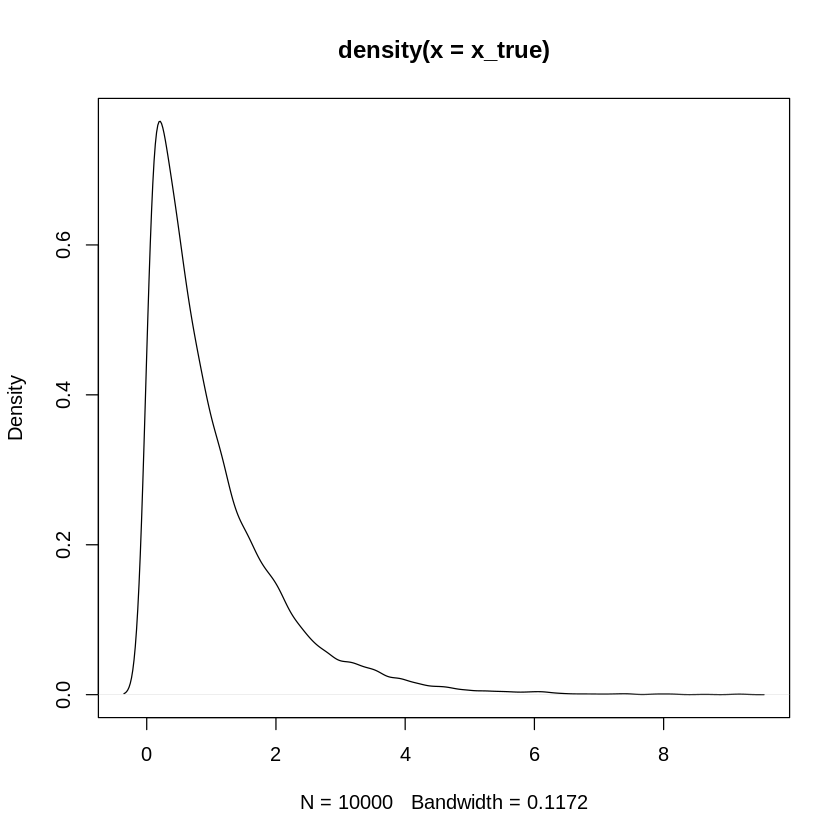

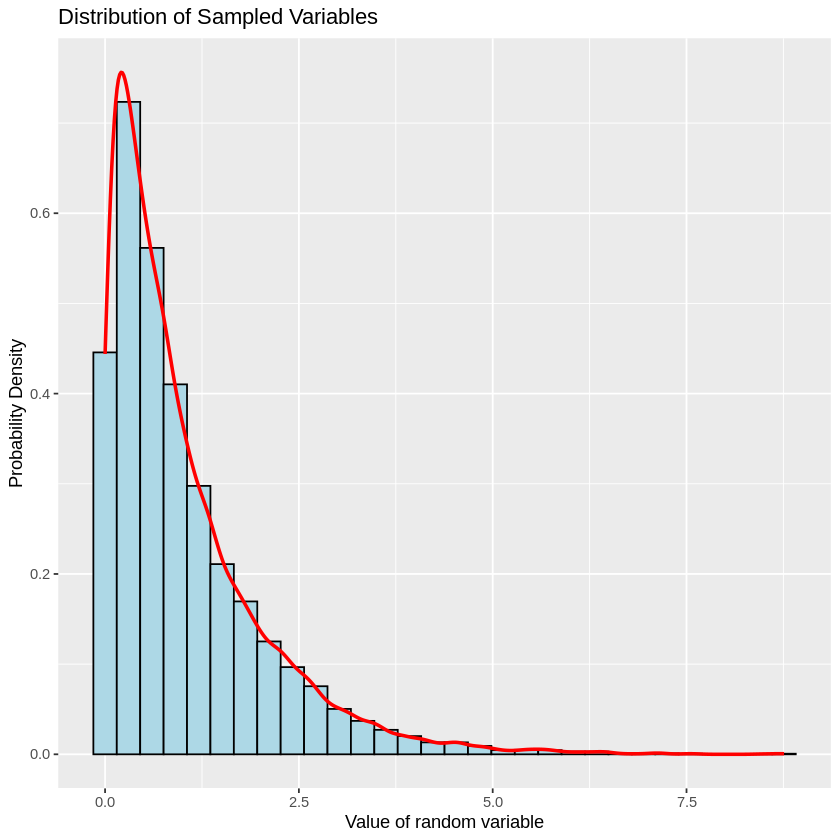

In [2]:
library(ggplot2)
library(ggdist)

a <- 1.0  # Parameter for exponential distribution
NS <- 10000  # Number of samples

#let r ~ U(0,1)
r = runif(NS,0,1)
x = -log(r)/a

# Generate random variables from exponential distribution
x_true <- rexp(NS, rate = a)
plot(density(x_true))

# Plot the distribution of sampled variables
p <- ggplot(data.frame(x), aes(x = x)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "lightblue", color = "black") +
  geom_density(aes(y = after_stat(density)), color = "red", size = 1) +
  labs(x = "Value of random variable", y = "Probability Density") +
  ggtitle("Distribution of Sampled Variables")

print(p)




# Rejection sampling

### **Example:**

Rejection sampling is a general technique that can be used when you have a function that majorizes your unknown distribution. It involves sampling from a simpler distribution (e.g., uniform or Gaussian) and then accepting or rejecting samples based on a comparison between the target distribution and the majorizing function.

The unknown target distribution given the equation of a triangle
$$ \frac{10-|x-5|}{12}$$ defined on $[2,8]$.

At every iteration we,
1.   Generate a uniform random variable from $[0,10]$.
2.   Generate another uniform random variable from $[0,30]$.
3.   If the 2nd random variable is less than or equal to the target distribution, we accept the value and append it to our list.
4. If the 2nd random variable is greater than the target distribution, we reject the value and return to step 1.





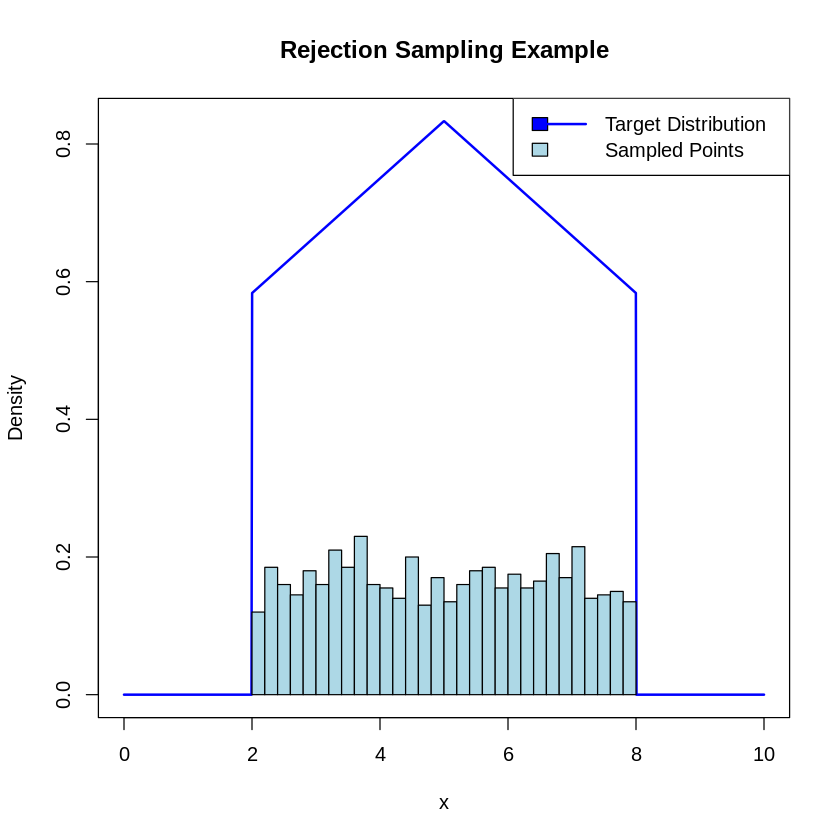

In [3]:
# Define the unknown target distribution function
target_distribution <- function(x) {
  if (x >= 2 && x <= 8) {
    return((10 - abs(x - 5)) / 12)
  } else {
    return(0)
  }
}

# Define the majorizing function (uniform distribution)
majorizing_function <- function(x) {
  #return(1/10)  # Uniform distribution within [0, 10]
  return(1/30)  # Uniform distribution within [0, 30]
}

# Define the number of samples to generate
num_samples <- 1000

# Generate samples using rejection sampling
samples <- c()
while (length(samples) < num_samples) {
  x <- runif(1, 0, 10)
  y <- runif(1, 0, majorizing_function(x))
  if (y <= target_distribution(x)) {
    samples <- c(samples, x)
  }
}

# Plot the target distribution and the sampled points
x_values <- seq(0, 10, length.out = 1000)
target_values <- sapply(x_values, target_distribution)

plot(x_values, target_values, type = "l", lwd = 2, col = "blue", xlab = "x", ylab = "Density",
     main = "Rejection Sampling Example")
hist(samples, breaks = 30, freq = FALSE, add = TRUE, col = "lightblue", border = "black", alpha = 0.5)
legend("topright", legend = c("Target Distribution", "Sampled Points"), lwd = c(2, 0), col = c("blue", "lightblue"), fill = c("blue", "lightblue"))


The histogram above shows the accepted values.

Keep in mind that the effectiveness of rejection sampling depends on finding an appropriate majorizing function that bounds the target distribution. In practice, it might require some trial and error to find the best majorizing function for a given target distribution.

The unknown target distribution is distributed as two wells which can be represented as exponential distributions.

Well 1: $e^{-(x-2)^2}$

Well 2: $e^{-(x-8)^2}$

Thus the distribution as a whole can be expressed as the sum of these two wells.

At every iteration we,
1.   Generate a uniform random variable from $[0,10]$.
2.   Generate another uniform random variable from $[0,1]$.
3.   If the 2nd random variable is less than or equal to the target distribution, we accept the value and append it to our list.
4. If the 2nd random variable is greater than the target distribution, we reject the value and return to step 1.

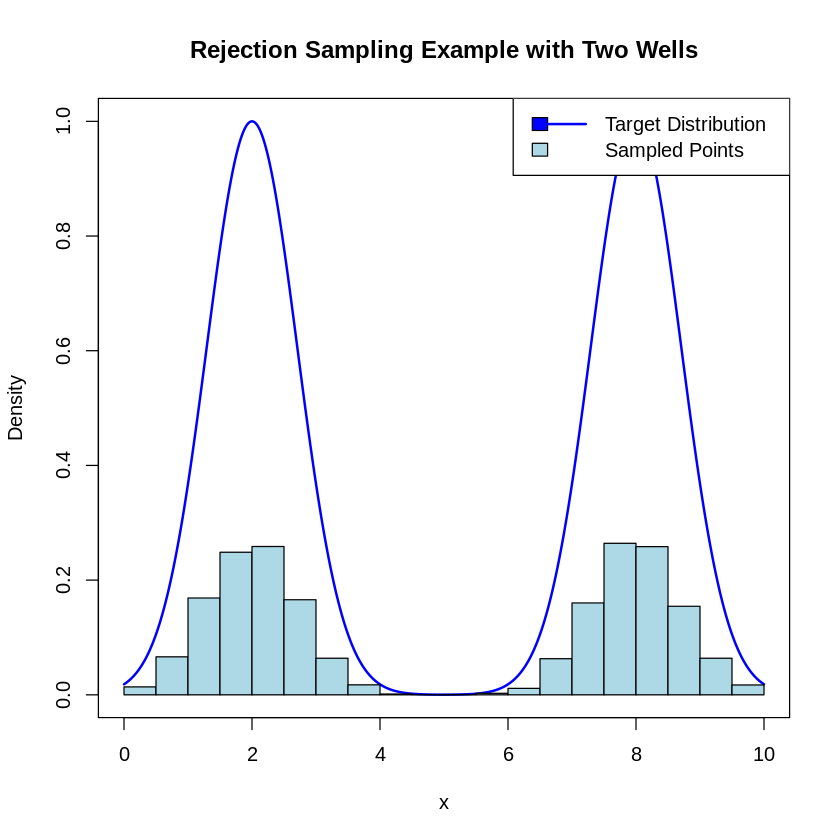

In [5]:
# Define the unknown target distribution function with two wells
target_distribution <- function(x) {
  well1 <- exp(-(x - 2) ^ 2)
  well2 <- exp(-(x - 8) ^ 2)
  return(well1 + well2)
}

# Define the majorizing function (uniform distribution)
majorizing_function <- function(x) {
  return(1)  # Uniform distribution within the range
}

# Define the number of samples to generate
num_samples <- 10000

# Generate samples using rejection sampling
samples <- c()
while (length(samples) < num_samples) {
  x <- runif(1, 0, 10)
  y <- runif(1, 0, majorizing_function(x))
  if (y <= target_distribution(x)) {
    samples <- c(samples, x)
  }
}

# Plot the target distribution and the sampled points
x_values <- seq(0, 10, length.out = 1000)
target_values <- sapply(x_values, target_distribution)

plot(x_values, target_values, type = "l", lwd = 2, col = "blue", xlab = "x", ylab = "Density",
     main = "Rejection Sampling Example with Two Wells")
hist(samples, breaks = 30, freq = FALSE, add = TRUE, col = "lightblue", border = "black", alpha = 0.5)
legend("topright", legend = c("Target Distribution", "Sampled Points"), lwd = c(2, 0), col = c("blue", "lightblue"), fill = c("blue", "lightblue"))


# Kernel Density Estimation

If you have a set of observations from the unknown distribution, you can estimate its probability density function (PDF) using kernel density estimation. Once you have the estimated PDF, you can sample from it using techniques like random sampling or Markov Chain Monte Carlo (MCMC) methods.

We generate a random sample of size 1000 from a known distribution (in this case, a Gaussian distribution with mean 2 and standard deviation 1.5). This sample will serve as our data.

Next, we use the "gaussian_kde" function from SciPy to perform the kernel density estimation. This function estimates the probability density function (PDF) using a Gaussian kernel. The Gaussian kernel is produced by sampling points from the continuous Gaussian. By default, it automatically determines the bandwidth parameter for the kernel based on the sample.

We generate a set of x-values using "np.linspace" to define the range over which we want to evaluate the density estimate.

Then, we evaluate the kernel density estimate at the x-values using the evaluate method of the KDE object.

Warning message:
“Removed 1000 rows containing missing values (`geom_line()`).”


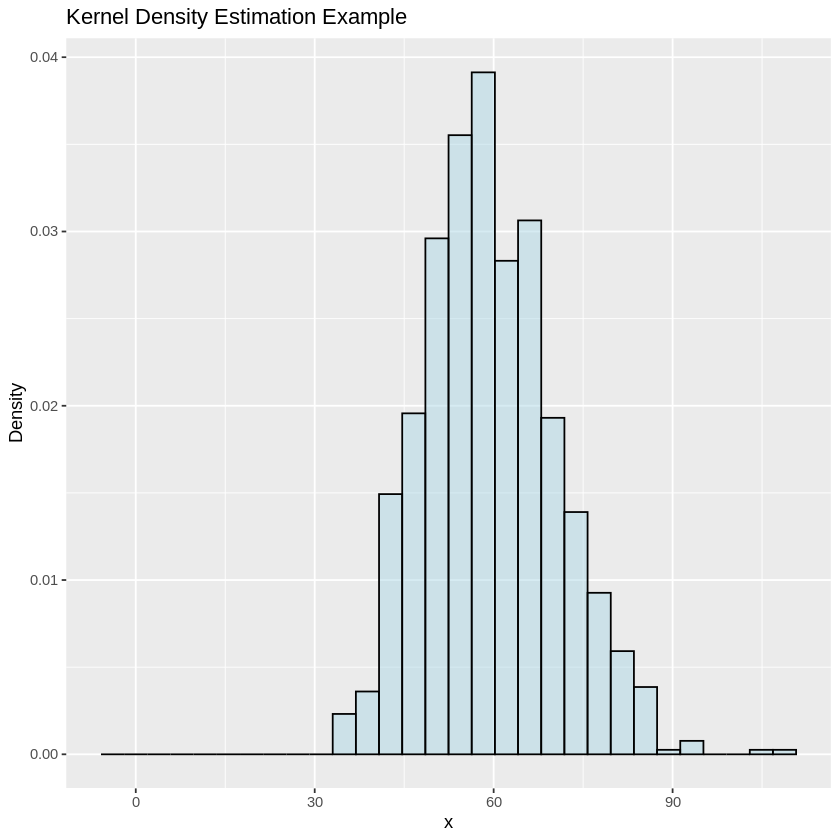

In [8]:
library(ggplot2)

# Set the seed for reproducibility
set.seed(0)

# Generate a random sample from a known distribution (e.g., Gaussian)
#sample <- rnorm(1000, mean = 2, sd = 1.5)
#sample <- rgamma(1000, shape=30, rate = .5)

# Perform kernel density estimation
kde <- density(sample)

# Generate x-values for evaluation
x_values <- seq(-5, 10, length.out = 1000)

# Evaluate the kernel density estimate at the x-values
density_estimation <- approxfun(kde)(x_values)

# Plot the original sample and the kernel density estimate
p <- ggplot(data.frame(x = sample), aes(x = x)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "lightblue", color = "black", alpha = 0.5) +
  geom_line(data = data.frame(x = x_values, density = density_estimation), aes(x = x, y = density), color = "red", size = 1) +
  labs(x = "x", y = "Density") +
  ggtitle("Kernel Density Estimation Example")

print(p)


In this example, we generate two random samples from different distributions. We will learn to use KDE to estimate the densities of multiple samples drawn from different distributions.

*   Sample 1 is drawn from a Gaussian distribution with mean 0 and standard deviation 1.
*   Sample 2 is drawn from a Gaussian distribution with mean 4 and standard deviation 0.5.

We then concatenate the two samples into a single array called "combined_sample".

Next, we perform kernel density estimation using the "gaussian_kde" function from SciPy on the combined sample.

We generate a set of x-values using "np.linspace" to define the range over which we want to evaluate the density estimate. Then, we evaluate the kernel density estimate at the x-values using the evaluate method of the KDE object.

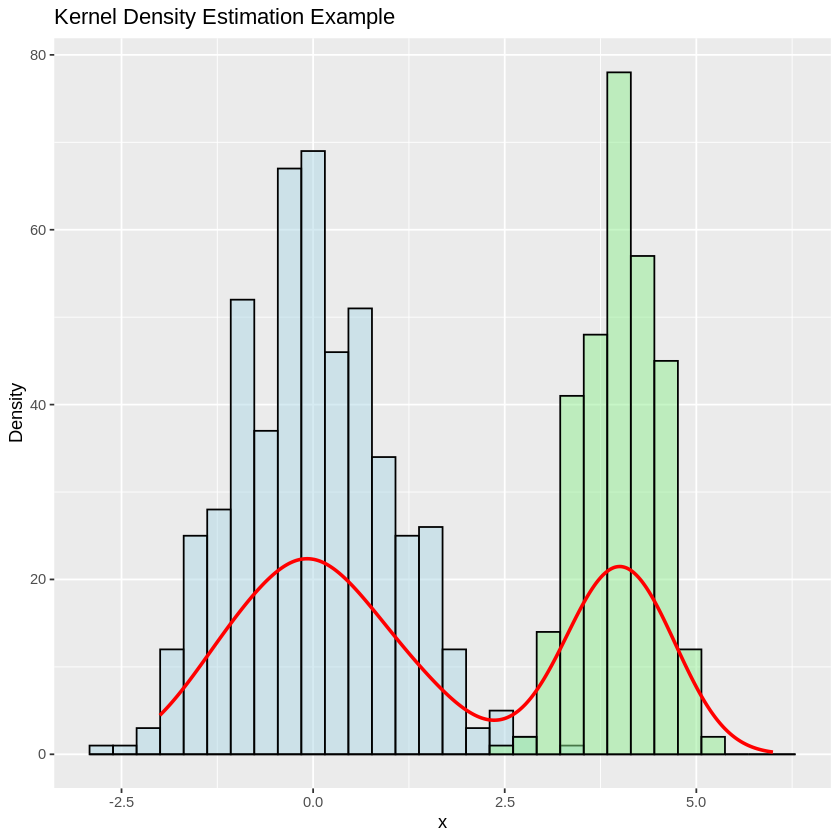

In [7]:
library(ggplot2)

# Set the seed for reproducibility
set.seed(0)

# Generate two random samples from different distributions
sample1 <- rnorm(500, mean = 0, sd = 1)
sample2 <- rnorm(300, mean = 4, sd = 0.5)

# Concatenate the two samples
combined_sample <- c(sample1, sample2)

# Perform kernel density estimation
kde <- density(combined_sample)

# Generate x-values for evaluation
x_values <- seq(-2, 6, length.out = 1000)

# Evaluate the kernel density estimate at the x-values
density_estimation <- approxfun(kde$x, kde$y)(x_values)

# Plot the original samples and the kernel density estimate
p <- ggplot() +
  geom_histogram(data = data.frame(x = sample1), aes(x = x), bins = 30, fill = "lightblue", color = "black", alpha = 0.5) +
  geom_histogram(data = data.frame(x = sample2), aes(x = x), bins = 30, fill = "lightgreen", color = "black", alpha = 0.5) +
  geom_line(data = data.frame(x = x_values, density = 100*density_estimation), aes(x = x, y = density), color = "red", size = 1) +
  labs(x = "x", y = "Density") +
  ggtitle("Kernel Density Estimation Example") +
  scale_fill_manual(values = c("lightblue", "lightgreen"), guide = "none")

print(p)

# Beta Distribution

The **CONTINUOUS** Beta distribution is used to model the behavior or random variables thaht fall in the interval $(0,1)$. The probability density function (PDF) is defined as

$$f(x) = \frac{Γ(\alpha + \beta)}{Γ(\alpha)Γ(\beta)}x^{\alpha - 1}(1-x)^{\beta -1}$$ where $0 < x < 1$.

The **mean** of a Beta random variable is $\frac{\alpha}{\alpha + \beta}$.

The **variance** of a Beta random variable is $\frac{\alpha \beta}{(\alpha+\beta+1)(\alpha+\beta)^2}$.

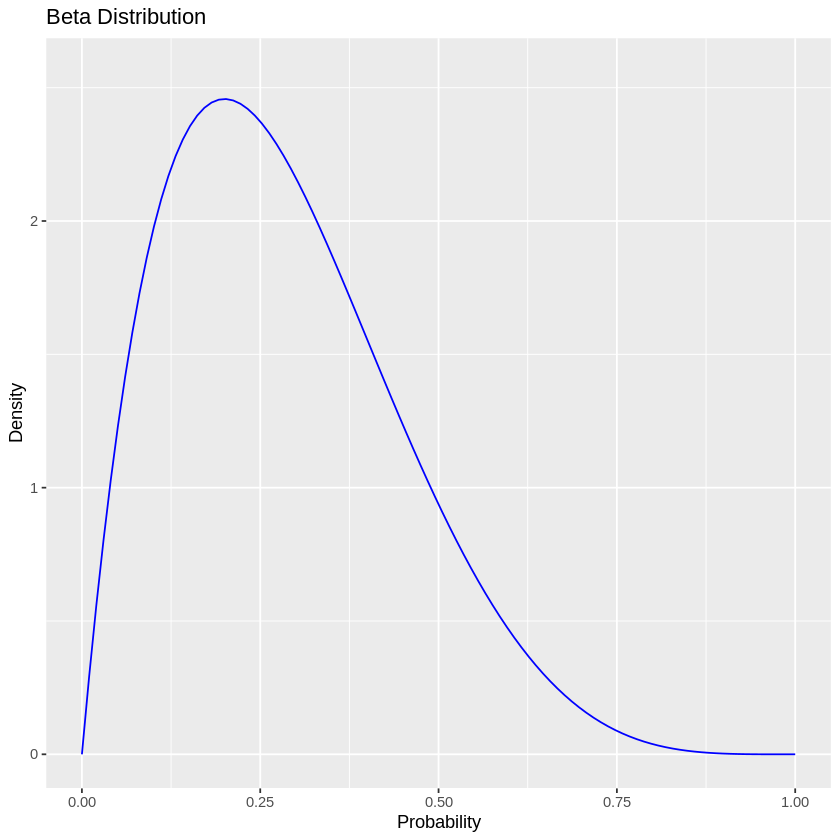

In [9]:
library(ggplot2)

# Parameters of the Beta distribution
alpha <- 2   # Shape parameter alpha
beta <- 5    # Shape parameter beta

# Generate x values
x <- seq(0, 1, length.out = 100)

# Calculate y values using the Beta distribution
y <- dbeta(x, alpha, beta) #gives your density function

# Create the plot
ggplot() +
  geom_line(aes(x, y), color = "blue") +
  xlim(0, 1) +
  ylim(0, max(y) + 0.1) +
  xlab("Probability") +
  ylab("Density") +
  ggtitle("Beta Distribution")


## Conditional Probability

What is the probability of an event given a specific set of information?

**Law of Total Probability**

Suppose that $B_1, \dots, B_n$ is a partition of the sample space $S$, then for any event $A$ we have
$$P(A) = \sum_{i=1}^{n}P(A \cap B_i) = \sum_{i=1}^{n}P(A|B_i)P(B_i)$$

i.e.
$$P(A) = P(A \cap B_1) + P(A \cap B_2) + \dots$$

$$= P(B_1)P(A|B_1) + P(B_2)P(A|B_2) + \dots$$


[![My Image](https://raw.githubusercontent.com/kjcook13/AMIGAS_2023/main/images/TotalProb.png)](https://raw.githubusercontent.com/username/repository/main/image.png)



**Prior Probability**
The probability of an event before the collection of new data.

**Posterior Probability**
The probability of an event after the collection of new data.

**Bayes' Formula**
The posterior probability or the probability of event $A$ occurring given that event $B$ has occurred.
$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(A)P(B|A)}{P(B)}$$

Note that the marginal probability (denominator) is the probability of the data with all possible hypotheses. That is $P(B|A)P(A) + P(B|A^c)P(A^c)$. In general,

$$P(A_i|B) = \frac{P(B|A_i)P(A_i)}{\sum_{j=1}^{n}P(B|A_j)P(A_j)} $$

[![My Image](https://raw.githubusercontent.com/kjcook13/AMIGAS_2023/main/images/bayes.png)](https://raw.githubusercontent.com/username/repository/main/image.png)


In [10]:
#Baye's Theorem code.example


# Prior probabilities so the things that you already know
prior_A <- 0.3   # Prior probability of event A
prior_B <- 0.7   # Prior probability of event B

# Conditional probabilities
p_B_given_A <- 0.6   # Probability of event B given event A
p_B_given_notA <- 0.2   # Probability of event B given not event A

# Bayes' theorem calculation
p_A_given_B <- (p_B_given_A * prior_A) / ((p_B_given_A * prior_A) + (p_B_given_notA * prior_B))

# Output the result
cat("Probability of A given B:", p_A_given_B, "\n")


Probability of A given B: 0.5625 


# Statistical Framework

Let $\theta$ be some unknown parameter (random variable); typically defined $\theta = (\theta_1, \theta_2, \dots, \theta_r)$, where $r$ denotes the number of parameters in the model.

Let $y = (y_1, y_2, \dots, y_n)$ be a **data** vector which provides information about $\theta$.

Let $f(y|\theta)$ be the **sampling distribution** of $y$ given $\theta$.

Let $p(\theta)$ be the **prior distribution** on $\theta$ representing the degree of belief of $\theta$.

We define the **posterior distribution** to be $p(\theta|y)$, the updated knowledge about $\theta$ conditional on $y$.

In this context, we redefine the **Bayes Theorem** as
$$p(\theta|y) \sim f(y|\theta)p(\theta)$$

The complete formula:
$$p(\theta|y) = \frac{f(y|\theta)p(\theta)}{∫f(y|\theta)p(\theta)}$$


Here $\theta$ is quantity that we wish to infer, and $y$ is our data. Bayes' Theorem tells us how observing $y$ affects our knowledge of the true quantity $\theta$, based on our current knowledge of $\theta$ represented by the prior $p(\theta)$, and our understanding of the model, represented by the likelihood $p(y \, | \, \theta)$.

**Additional Background:**
The normalizing constant in Bayes' Theorem is required to ensure that the posterior probabilities over $\theta$ sum to $1$. It can be explicitly written as

$$ p(y \, | \, \theta) = \int p(y \, | \, \theta) \, p(\theta) \, d\theta $$

This is an integral over *all* possible values of $\theta$.

# Inference on Binomial Model

Let $y$ be the number of successes over $n$ trials; $y = 0,1,2, \dots, n$. Let $\theta$ be the probability of success for a single trial; $0 < \theta < 1$.

We need to define a **prior** distribution for $\theta$. We can let this be uniformative $p(\theta)=1$ (assume we know nothing about the parameter), we can assume $\theta$ follows some probability distribution. For example, we could say that $\theta \sim U(0,1)$ or $\theta \sim Beta(a,b)$ when $\theta$ is non-informative with $a=b=1$.

Compute the **posterior distribution** using the definition above.

$$p(\theta|y) = {n \choose y}\theta^y(1-\theta)^{n-y} \frac{\theta^{a-1}(1-\theta)^{b-1}}{Β(a,b)}$$

Factor out the constants and we have

$$p(\theta|y) = \theta^{y+1-1}(1-\theta)^{n-y+1-1}$$

This is in the form of a Beta probability distribution

$$Beta(y+1,n-y+1)$$

From our study of the Beta distribution, the $E(\theta|y) = \frac{y+1}{n-y+1}$



In [ ]:
# Load required packages
library(ggplot2)
library(gridExtra)

# Generate some example data
# One experiment of the number of successes in n trials
set.seed(123)
n <- 100   # Number of trials
p_true <- 0.3  # True probability of success
observed_success <- rbinom(1, n, p_true)  #this is y in our example above

cat("Number of successes:", observed_success, "\n")

# Prior parameters
# note that this is essentially Uniform whem alpha = beta = 1
alpha <- 1  # Shape parameter of the Beta prior
beta <- 1   # Shape parameter of the Beta prior

# Bayesian inference
posterior_alpha <- alpha + observed_success
posterior_beta <- beta + n - observed_success

# Generate posterior samples
num_samples <- 10000
posterior_samples <- rbeta(num_samples, posterior_alpha, posterior_beta)

# Plotting the posterior distribution
posterior_density <- density(posterior_samples)
posterior_df <- data.frame(x = posterior_density$x, y = posterior_density$y)
prior_df <- data.frame(x = c(0, 1), y = dbeta(c(0, 1), alpha, beta))

p <- ggplot() +
  geom_line(data = prior_df, aes(x, y), color = "blue", linetype = "dashed") +
  geom_line(data = posterior_df, aes(x, y), color = "red") +
  xlim(0, 1) +
  ylim(0, max(posterior_df$y, prior_df$y)) +
  xlab("Probability of Success") +
  ylab("Density") +
  ggtitle("Posterior Distribution")

print(p)

# Plotting the prior and posterior distributions together
prior_plot <- ggplot() +
  geom_line(data = prior_df, aes(x, y), color = "blue", linetype = "dashed") +
  xlim(0, 1) +
  ylim(0, max(prior_df$y)) +
  xlab("Probability of Success") +
  ylab("Density") +
  ggtitle("Prior Distribution")

posterior_plot <- ggplot() +
  geom_line(data = posterior_df, aes(x, y), color = "red") +
  xlim(0, 1) +
  ylim(0, max(posterior_df$y)) +
  xlab("Probability of Success") +
  ylab("Density") +
  ggtitle("Posterior Distribution")

grid.arrange(prior_plot, posterior_plot, nrow = 2)

# Summary statistics
mean_posterior <- mean(posterior_samples)
median_posterior <- median(posterior_samples)
credible_interval <- quantile(posterior_samples, c(0.025, 0.975))

cat("Posterior mean:", mean_posterior, "\n")
cat("Posterior median:", median_posterior, "\n")
cat("95% Credible Interval:", credible_interval[1], "-", credible_interval[2], "\n")


# Inference on Normal Model

Let $y$ be a normal random varible representing lengths. We know from our studies that the Normal distribution is defined as
$$y|\theta,\sigma^2 \sim N(\theta,\sigma^2).$$

The parameters of interest are $\theta$ the true average length and $\sigma^2$ the true variance in length. The probability density function (PDF) is

$$p(y|\theta,\sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\{-\frac{(y-\theta)^2}{2\sigma^2}\}$$

where $-\infty < y < \infty$.

Suppose we have $n=200$ length observations. Each is conditionally independent:

$$y_1, \dots, y_n| \theta, \sigma^2 \sim N(\theta,\sigma^2)$$

Thus, $Y = (y_1, \dots, y_n)$, then
$$p(Y|\theta, \sigma^2 )= \Pi_{i=1}^{n} p(y_i|\theta, \sigma^2 )$$

$$= \frac{1}{\sqrt{2\pi \sigma^2}}\exp\{-\frac{(y_i-\theta)^2}{2\sigma^2}\}$$

$$=(2\pi \sigma^2)^{-\frac{n}{2}}\exp\{-\frac{1}{2\sigma^2} \sum_{i=1}^{n}(y_i - \theta)^2\}$$

Assume one parameter is known, and compute the posterior for the other parameter.

When $\theta$ is unknown and $\sigma^2$ is known, we fix $\sigma^2$:

$$p(\theta|y,\sigma^2) \sim p(y|\theta,\sigma^2)p(\theta)$$

When $\theta$ is known and $\sigma^2$ is unknown, we fix $\theta$:

$$p(\sigma^2|y,\theta) \sim p(y|\theta, \sigma^2)p(\sigma^2)$$

Assume both parameters are unknown, and compute a joint posterior for $(\theta, \sigma^2)$:

$$p(\theta,\sigma^2|y) \sim p(y|\theta,\sigma^2)p(\theta,\sigma^2)$$

**Prior Model for $\theta$**

Assume that the true variance of $Y$ is $\sigma^2 = 45$. Therefore, we need to define a prior for $\theta$.
$$\theta \sim N(\mu_0, \tau_0^2)$$, where $\mu_0$ is the mean of the prior beliefs and $\tau_0^2$ is the uncertainty in the prior beliefs. Thus the probability density function for the prior is
$$p(\theta) = \frac{1}{\sqrt{2\pi \tau_0^2}}\exp \{- \frac{(\theta - \mu_0)^2}{2 \tau_0^2}\}$$

We use Bayes Theorem to compute the posterior.

$$p(\theta| Y,\sigma^2) = p(Y|\theta,\sigma^2)p(\theta)$$

$$= p(\theta) p(y_1|\theta,\sigma^2)× … × p(y_n|\theta,\sigma^2)$$

$$ = \frac{1}{\sqrt{2\pi \tau_0^2}} \exp\{ - \frac{(\theta - \mu_0)^2}{2 \tau_0^2}\} × (2\pi \sigma^2)^{-\frac{n}{2}} \exp \{-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - \theta)^2\}$$

Factor out the constants and simplify the remaining terms by first expanding.

$$\sim \exp \{ -\frac{1}{2} [(\frac{\theta - \mu_0}{\tau_0})^2 + \sum_{i=1}^n (\frac{y_i - \theta}{\sigma})^2] \}$$

Expand and combine the terms with $\theta^2$, $\theta$, and the remaining terms.

Terms with $\theta^2$:
$$(\frac{1}{\tau_0^2}+\frac{n}{\sigma^2})\theta^2$$

Terms involving $\theta$:
$$-2(\frac{\mu_0}{\tau_0^2} + \frac{\sum y_i}{\sigma^2})\theta$$

Remaining terms:
$$\frac{\mu_0^2}{\tau_0^2}+ \sum \frac{x_i^2}{\sigma^2}$$

We then rewrite in the form of the normal distribution. Note that everything inside the exponential function is in the form of a quadratic equation. By completing the square, we can write this in the form of a Normal distribution using some algebra.

$$\sim \exp \{ (\frac{\theta - \mu_0^*}{\tau_0^*})^2 + (\frac{\mu_0^2}{\tau^2}+ \sum_i \frac{y_i^2}{\sigma^2} - \frac{(\frac{\mu_0}{\tau_0^2} + \frac{\sum y_i}{\sigma^2})^2}{\frac{1}{\tau_0^2} + \frac{n}{\sigma^2}}) \}$$

Therefore, the posterior mean is

$$\mu^*_0 = \frac{\frac{\mu_0}{\tau_0^2} + \frac{\sum y_i}{\sigma^2}}{\frac{1}{\tau_0^2} + \frac{n}{\sigma^2}}$$

and the posterior variance is

$$(\tau^*_0)^2 = \frac{1}{\frac{1}{\tau_0^2} + \frac{n}{\sigma^2}}$$

The posterior distribution for $\theta$ is Normal($\mu^*_0,\tau^*_0$).




In [ ]:
# Load required packages
library(ggplot2)

# Generate some example data
set.seed(123)
n <- 100   # Number of data points
observed_data <- rnorm(n, mean = 5, sd = 2)  # Simulated observed data

plot(density(observed_data))

# Prior parameters
prior_mean <- 0   # Prior mean
# change the prior sd to something very small vs very large to see how this affects the posterior
prior_sd <- 10    # Prior standard deviation

# Bayesian inference
# posterior_mean <- (prior_mean / prior_sd^2 + sum(observed_data) / n) / (1 / prior_sd^2 + 1 / n)
# posterior_sd <- sqrt(1 / (1 / prior_sd^2 + n / 1))

posterior_mean <- (prior_mean / prior_sd^2 + sum(observed_data) / sd(observed_data)^2) / (1 / prior_sd^2 + n/(sd(observed_data)^2))
posterior_sd <- sqrt(1 / (1 / prior_sd^2 + n/(sd(observed_data)^2)))

# Plotting the prior and posterior distributions
x <- seq(prior_mean - 4 * prior_sd, prior_mean + 4 * prior_sd, length.out = 100)
prior_density <- dnorm(x, mean = prior_mean, sd = prior_sd)
posterior_density <- dnorm(x, mean = posterior_mean, sd = posterior_sd)

prior_df <- data.frame(x, y = prior_density)
posterior_df <- data.frame(x, y = posterior_density)

p <- ggplot() +
  geom_line(data = prior_df, aes(x, y), color = "blue", linetype = "dashed", lwd = 1) +
  geom_line(data = posterior_df, aes(x, y), color = "red", lwd = 1) +
  xlim(prior_mean - 4 * prior_sd, prior_mean + 4 * prior_sd) +
  ylim(0, max(prior_density, posterior_density) + 0.05) +
  xlab("Mean") +
  ylab("Density") +
  ggtitle("Prior and Posterior Distributions")

print(p)

# Summary statistics
cat("Posterior mean:", posterior_mean, "\n")
cat("Posterior standard deviation:", posterior_sd, "\n")


# Inference on Gene expression Model

Consider a bacterial gene $G$ that produces mRNA $M$ at a fixed but unknown rate $\sigma$. mRNA typically gets degraded at a fixed rate $d$ that can be measured directly; in this example, the degradation rate is measured to be about $d = 0.5/\textrm{h}$. We want to infer the production rate $\sigma$ by measuring gene expression in 30 cells using an smFISH experiment. After the experiments have been performed, the data looks like this:

In [ ]:
data_ge <- c(20, 20, 19, 16, 15, 22, 17, 27, 17, 17, 21, 21, 16, 22, 25, 22, 23,
            20, 21, 16, 16, 18, 16, 21, 17, 21, 25, 16, 15, 23)

# Create a histogram
hist(data_ge, breaks = 21, xlim = c(9.5, 30.5), col = "lightblue", border = "black",
     xlab = "mRNA", ylab = "Frequency")

# Set x-axis label and y-axis label
xlabel <- expression("mRNA")
ylabel <- expression("Frequency")
mtext(side = 1, text = xlabel)
mtext(side = 2, text = ylabel)



Let us review the individual parts in Bayes' Theorem for this example.
1. **The prior $p(\theta)$:** Bacteria tend to be small and express only few mRNA molecules. A realistic production rate could be about $5/\mathrm{h}$, but this depends on the gene. For our prior we choose a widely dispersed Gamma distribution with shape $1$ and mean $10$:

$$ p(\theta) = \textrm{Gamma}(\theta; 1, 5) $$

2. **The likelihood $p(y  \, | \, \theta)$:** The cells have been kept in the lab for a while, so we assume that mRNA production has reached steady state. At steady state, mRNA counts for this model are Poisson distributed with mean $\theta / d$:

$$ p(n \, | \, \theta) = \textrm{Poisson}(n; \theta / d) $$

Here $n$ is the number of mRNA measured. The total likelihood is just the product of the likelihoods for each individual cell, since we assume that each cell is independent of the others:

$$ p(y\, | \, \theta) = \prod_{i=1}^{30} \textrm{Poisson}(n_i; \theta / d) $$

3. **The posterior $p(\theta \, | \, y)$:** In this example we can still compute this explicitly. This does not work for more complex models of gene expression.

As before, computing the posterior requires the normalisation constant (we will not compute this today).

**Important:** In the Bayesian setting we have to decide the prior *before* looking at the data.

In [ ]:
library(ggplot2)
library(gtools)

# Set the degree value
deg <- 0.5

# Define the data
data_ge <- c(20, 20, 19, 16, 15, 22, 17, 27, 17, 17, 21, 21, 16, 22, 25, 22, 23,
              20, 21, 16, 16, 18, 16, 21, 17, 21, 25, 16, 15, 23)

# Create the x-axis values
xx <- seq(0, 20, 0.01)

# Define the prior function
prior_ge <- function(h) {
  dgamma(h, shape = 1, scale = 5)
}

# Calculate the prior values
prior_values <- prior_ge(xx)

# Create a data frame for the prior
prior_data <- data.frame(xx, prior_values)

# Define the likelihood function
likelihood_ge <- function(data, sigma) {
  product <- 1
  for (n in data) {
    product <- product * dpois(n, lambda = sigma / deg)
  }
  return(product)
}

# Calculate the likelihood values
likelihood_values <- likelihood_ge(data_ge, xx)

# Create a data frame for the likelihood
likelihood_data <- data.frame(xx, likelihood_values)

# Calculate the unnormalized posterior values
posterior_unnormalised_values <- likelihood_ge(data_ge, xx) * prior_ge(xx)

# Create a data frame for the unnormalized posterior
posterior_unnormalised_data <- data.frame(xx, posterior_unnormalised_values)

# Plot the prior
plot_prior <- ggplot(prior_data, aes(x = xx, y = prior_values)) +
  geom_line(color = "blue") +
  geom_area(fill = "blue", alpha = 0.3) +
  labs(title = "Prior\n", x = "Production rate ", y = "") +
  theme_minimal() +
  theme(axis.text.y = element_blank(), axis.ticks.y = element_blank())

# Plot the likelihood
plot_likelihood <- ggplot(likelihood_data, aes(x = xx, y = likelihood_values)) +
  geom_line(color = "orange") +
  labs(title = "Likelihood\n", x = "Production rate ", y = "") +
  theme_minimal() +
  theme(axis.text.y = element_blank(), axis.ticks.y = element_blank())

# Plot the posterior
plot_posterior <- ggplot(posterior_unnormalised_data, aes(x = xx, y = posterior_unnormalised_values)) +
  geom_line(color = "green") +
  geom_area(fill = "green", alpha = 0.3) +
  labs(title = "Posterior\n(Prior × Likelihood)", x = "Production rate ", y = "") +
  theme_minimal() +
  theme(axis.text.y = element_blank(), axis.ticks.y = element_blank()) +
  scale_x_continuous(limits = c(0, 20))

# Combine the plots
plot_combined <- gridExtra::grid.arrange(plot_prior, plot_likelihood, plot_posterior,
                                         nrow = 1, widths = c(4, 4, 4))

# Display the combined plot
print(plot_combined)


## Monte Carlo methods

A Monte Carlo method, named after a famous casino in Monaco, is any algorithm that uses randomly generated numbers to solve a numerical problem.

For example, if we try to estimate the mean of a probability distribution $p(x)$, we can draw a few samples from $p(x)$ and compute their average. This will give a rough estimate of the mean, and we can make our estimate more precise by drawing more samples from $p(x)$. Note that our estimate of the mean can fluctuate randomly, even though the true mean of $p(x)$ is a deterministic quantity.

The main advantage of Monte Carlo approaches is that they are often easier to implement than other methods, and they are usually flexible enough to work for many related problems with small modifications. Their main disadvantage is that the outputs are random by nature, and obtaining enough samples to obtain reliable estimates can be very time-consuming for some problems.

The individual steps for a typical Monte Carlo method are:
1. Fix a probability distribution to sample from
2. Generate a sequence of random samples from that probability distribution
3. Perform a deterministic computation on each sample
4. Combine your results to arrive at the answer

# **Example:** Computing the number $\pi$ using Monte Carlo

To demonstrate the flexibility of Monte Carlo methods we can try to compute $\pi$ using randomness. In the figure below we see a circle with radius $r = 1$:

In [ ]:
# Generate angles in radians
theta <- seq(0, 2 * pi, length.out = 100)

# Generate coordinates of points on the circle
x <- cos(theta)
y <- sin(theta)

# Plot the circle
plot(x, y, type = "l", asp = 1, xlim = c(-1, 1), ylim = c(-1, 1),
     xlab = "x", ylab = "y", main = "Circle with Radius 1")

# Add axes
abline(h = 0, v = 0, col = "gray", lty = "dotted")

# Add a circle outline
lines(x, y, col = "blue", lwd = 2)


From the formula $A = \pi r^2$ we know that the circle has area $\pi$. The square containing the circle has area $4$, so the circle fills out $\pi/4$ of the square. So if we sample a point at random from the square, then with probability $\pi/4$ it will lie in the circle.

We can now estimate $\pi$ by repeatedly sampling points from the square and counting how many of them lie in the circle. Our steps are:

1. Our probability distribution is uniform on the square.
2. Sample points from that distribution. They will cover the square evenly.
3. For each point, check if it lies inside the unit circle.
4. Return the fraction of points that pass the test, times $4$.

In [ ]:
# Set the seed for reproducibility
set.seed(0)

# Number of random points to generate
num_points <- 10000

# Generate random x and y coordinates within the square
x <- runif(num_points, min = -1, max = 1)
y <- runif(num_points, min = -1, max = 1)

# Calculate the distance from the origin for each point
dist <- sqrt(x^2 + y^2)

# Check if each point falls within the quarter circle
inside_circle <- dist <= 1

# Count the number of points inside the circle
num_inside_circle <- sum(inside_circle)

# Estimate the area of the circle
circle_area <- num_inside_circle / num_points

# Approximate pi
pi_approx <- 4 * circle_area

# Print the estimated value of pi
cat("Estimated value of pi:", pi_approx, "\n")

# Plot the sampled points and the circle
plot(x, y, xlim = c(-1, 1), ylim = c(-1, 1), xlab = "x", ylab = "y", main = "Estimating Pi using Random Sampling")
points(x[inside_circle], y[inside_circle], col = "blue", pch = 16)
points(x[!inside_circle], y[!inside_circle], col = "red", pch = 16)
theta <- seq(0, 2 * pi, length.out = 100)
circle_x <- cos(theta)
circle_y <- sin(theta)
lines(circle_x, circle_y, col = "black")


In [ ]:
# Set the seed for reproducibility
set.seed(0)

# Number of points to generate
N <- 1000000

# Generate random x and y coordinates within the square
points <- matrix(runif(2 * N, min = -1, max = 1), ncol = 2)

# Check which points are inside the circle
inside <- rowSums(points^2) <= 1

# Compute a running estimate of π
pi_est <- 4 * cumsum(inside) / seq_len(N)

# Create the plot
par(mfrow = c(1, 2), mar = c(4, 4, 2, 1))

# Plot the estimate vs. π
plot(pi_est, ylim = c(3.1, 3.2), xlab = "Number of samples",
     ylab = "Estimate for π",
     main = "Estimate vs. π", type = "l")
abline(h = pi, col = "black")

# Plot the estimate error
plot(pi_est - pi, ylim = c(-0.1, 0.1), xscale = "log", xlim = c(100, N),
     xlab = "Number of samples", ylab = "Estimate error",
     main = "Estimate Error", type = "l")
abline(h = 0, col = "black")

# Reset the par settings
par(mfrow = c(1, 1))


# Markov Chain Monte Carlo (MCMC)

Given an arbitrary target distribution $\pi$, we construct a Markov chain whose stationary distribution is $\pi$. We can then sample from $\pi$ by picking an initial value $X_0$ and simulating the Markov chain until we have reached the stationary distribution. We can formalise this as follows

**Input:** Target distribution $\pi(x)$.

**Output:** Samples from the target distribution.

**Steps:**
1. Construct a Markov chain whose stationary distribution is $\pi$
2. Pick an arbitrary initial value $X_0$
3. Simulate steps $X_1, X_2, X_3, \ldots$ until $p(X_N) \approx p(X_\infty) = \pi$
4. Return $X_N, X_{N+1}, X_{N+2}, \ldots$

The number of steps required until $p(X_N)$ resembles $\pi$ is called the burn-in period. The samples during the burn-in period, depending on the initial value $X_0$, will not be distributed correctly and are discarded. Once the burn-in is complete, subsequent samples will be approximately distributed according to the target distribution.

**Note:** The stationary distribution is an *asymptotic* limit, ie. $p(X_n)$ only approximates the target distribution for large $n$. Our algorithm is therefore not exact, but we can make the difference between $p(X_n)$ and $\pi$ as small as desired by picking a suitably large burn-in period.

**Note:** Each sample returned from the algorithm is (approximately) sampled from $\pi$, but the samples are not *independent*. Because we are simulating a random walk, each sample will be similar to the last sample. We may need a lot of samples to fully explore the target distribution.

The main question we are left with is that of constructing the right Markov chain. There are a variety of ways to do this, but the most widespread one is the Metropolis-Hastings algorithm.




# MCMC Example

The target distribution is the distribution we want to sample from (in this case, an unnormalized distribution defined by a mathematical function). The proposal distribution is a distribution from which we generate proposed samples. Here, we use a normal distribution centered at the current sample value.

We then perform the MCMC sampling by running a loop for the desired number of samples. In each iteration, we generate a proposal, calculate the acceptance ratio, and accept or reject the proposal based on the acceptance ratio and a random uniform value. We store the accepted samples in a vector.



In [ ]:
# @title MCMC Example

# Define the target distribution (unnormalized)
target_distribution <- function(x) {
  return(exp(-x^2 / 2) * cos(5*x))
}

# Define the proposal distribution (normal distribution)
proposal_distribution <- function(x, sigma) {
  return(rnorm(1, mean = x, sd = sigma))
}

# Perform MCMC sampling
n_samples <- 10000
burn_in <- 1000
sigma <- 0.5

# Initialize the chain
x <- 0
samples <- numeric(n_samples)

# Run the MCMC chain
for (i in 1:n_samples) {
  # Generate a proposal
  x_proposal <- proposal_distribution(x, sigma)

  # Calculate the acceptance ratio
  acceptance_ratio <- target_distribution(x_proposal) / target_distribution(x)

  # Accept or reject the proposal
  if (runif(1) < acceptance_ratio) {
    x <- x_proposal
  }

  # Store the sample
  samples[i] <- x
}

# Remove burn-in samples
samples <- samples[(burn_in + 1):n_samples]

# Plot the samples
hist(samples, breaks = "FD", freq = FALSE,
     main = "MCMC Sampling",
     xlab = "x", ylab = "Density")

# Plot the sampled points
points(samples, rep(0, length(samples)), col = "red")


# Plot the target distribution
curve(target_distribution, from = -4, to = 4, add = TRUE, col = "blue", lwd = 2, n = 1000)


# The Metropolis-Hastings algorithm

Assume we are given a target distribution $\pi$ and *any* Markov chain with transition probabilities $p(x \, | \, y)$. In general, $\pi$ will not be the stationary distribution of this Markov chain. But by tweaking the transition probabilities a little bit we can always arrange for that to be the case.

**Notation:** In the following we denote the original transition properties by $q(x \, | \, y) = P(x \, | \, y)$. This notation is almost universally in the MCMC literature.

Every time the particle wants to move from state $x$ to another state $y$, there is a certain chance that the particle stays at $x$. If this happens we say that the move has been rejected, otherwise it is accepted and the particle moves to $y$.

Denote by $\alpha(y \, | \, x)$ the probability that a move from $x$ to another state $y$ is accepted. The transition probability from $x$ to $y$ changes from  $q(y \, | \, x)$ to $\alpha(y \, | \, x) \cdot q(y \, | \, x)$. This defines another Markov chain.

Our target distribution satisfies detailed balance for this Markov chain if

$$ \frac{\pi(x)}{\pi(y)} = \frac{q(x \, | \, y) \cdot \alpha(x \, | \, y)}{q(y \, | \, x) \cdot \alpha(y \, | \, x)} $$

We can rearrange this as

$$ \frac{\alpha(y \, | \, x)}{\alpha(x \, | \, y)} = \frac{\pi(y)}{\pi(x)} \cdot \frac{q(x \, | \, y)}{q(y \, | \, x)} $$

Call the right-hand side $r(y, x)$. We can choose any set of acceptance probabilities between $x$ and $y$ as long as they are between $0$ and $1$ and satisfy the equation below. The perhaps simplest way to achieve this is the following:
* If $r(y, x) < 1$, let $\alpha(y \, | \, x) = r(y, x)$ and $\alpha(x \, | \, y) = 1$
* If $r(y, x) > 1$, let $\alpha(y \, | \, x) = 1$ and $\alpha(x \, | \, y) = 1 / r(y, x)$

This quantity is called the acceptance ratio.

In pseudocode, if we start at position $x$, to perform the next step we do the following:
1. Sample a value $y$ from $q(y \, | \, x)$
2. Compute the Metropolis-Hastings ratio
$$\alpha = \frac{\pi(y)}{\pi(x)} \cdot \frac{q(x \, | \, y)}{q(y \, | \, x)}$$
3. If $\alpha > 1$, move to $y$. Else, $\alpha \leq 1$, so move to $y$ with probability $\alpha$, otherwise stay at $x$.

**Note:** Since each step is subject to rejection, the Metropolis-Hastings algorithm will often stay at the same state for many steps. This duplication is expected behaviour.

**Important:** The Metropolis-Hastings algorithm only uses the probability ratio $\pi(y) / pi(x)$. We therefore do not have to know the normalizing constant of $\pi$ as it cancels out in any case. This makes Metropolis-Hastings very useful for Bayesian inference, where we can often compute the unnormalized posterior (prior times likelihood), but not the normalization constant.

## Metropolis Hastings Flipping Coins Example

We can visualise the Bayesian approach using a simple coin example. In my wallet I have a coin which has a fixed probability $h$ to land heads each time it is flipped. How much can we say about $h$ by observing how the coin behaves? We flip the coin $8$ times and observe the sequence $H, H, H, H, T, H, H, H$.

We can use our helper function to perform MCMC for us. We choose $X_0 = 0.5$ for our initial position, although any number between $0$ and $1$ will be fine. The width of our proposal distribution is $0.1$ - while any positive number will work in theory, very small or very large values will result in slow convergence. We already have the (unnormalized) posterior density, and finally choose a burn-in period of $1000$.

In [ ]:
# @title Metropolis Hastings Example 1

prior_ct <- function(h) {
  return(dbeta(h, 4, 4))
}

likelihood_ct <- function(data, h) {
  n_heads <- sum(data)
  n_tails <- length(data) - n_heads

  return(h^n_heads * (1-h)^n_tails)
}

posterior_unnormalized_ct <- function(h, data) {
  return(likelihood_ct(data, h) * prior_ct(h))
}

simulate_step <- function(log_target, proposal_width, x) {
  # Propose a new value
  y <- x + proposal_width * rnorm(length(x))

  log_alpha <- log_target(y) - log_target(x)  # The q-terms cancel

  if (log_alpha > 0) {
    return(y)  # Accept
  }

  alpha <- exp(log_alpha)

  p <- runif(1)
  if (p < alpha) {
    return(y)  # Accept
  } else {
    return(x)  # Reject
  }
}

metropolis_hastings <- function(log_target, proposal_width, nsteps, x0) {
  ret <- matrix(0, nrow = nsteps, ncol = length(x0))
  ret[1, ] <- x0

  for (i in 2:nsteps) {
    ret[i, ] <- simulate_step(log_target, proposal_width, ret[i - 1, ])
  }

  return(ret)
}

library(ggplot2)

data_ct = c( 1, 1, 1, 1, 0, 1, 1)  # 1 for heads, 0 for tails
n_heads = sum(data_ct)

logposterior_unnormalized_ct <- function(x) {
  h <- x[1]
  # if (h < 0 || h > 1) {
  #   return(-Inf)
  # }

  return(log(posterior_unnormalized_ct(h, data_ct)))
}

nsamples <- 1000
burnin <- 1000
post_ct_mcmc <- metropolis_hastings(logposterior_unnormalized_ct, 0.1, nsamples + burnin, c(0.5))
post_ct_mcmc <- post_ct_mcmc[(burnin+1):length(post_ct_mcmc), 1]  # We assume a burn-in period of 100

# This is the actual posterior
post_ct_exact <- rbeta(nsamples, 4 + n_heads, 4 + length(data_ct) - n_heads)

# Plotting
#par(mfrow = c(1, 2), mar = c(4, 4, 2, 2), mgp = c(2.5, 0.8, 0))

hist(post_ct_mcmc, breaks = 30, xlim = c(0, 1), ylim = c(0, 100),
     xlab = "Head probability h", ylab = "Posterior probability",
     main = "MCMC vs. Exact Posterior",
     col = "lightblue", border = "white")
hist(post_ct_exact, breaks = 30, xlim = c(0, 1), ylim = c(0, 100),
     add = TRUE, col = "lightgreen", border = "white")

legend("topright", legend = c("MCMC", "Exact"), fill = c("lightblue", "lightgreen"))

plot(post_ct_mcmc, type = "l", xlim = c(0, nsamples), ylim = c(0, 1),
     xlab = "Iterations", ylab = "Heads probability h",
     main = "MCMC vs. Exact Posterior",
     col = "lightblue", lwd = 2)
lines(post_ct_exact, col = "lightgreen", lwd = 2)


# Metropolis Hastings Gene Expression Example

To demonstrate the flexibility of MCMC we only have to change a few lines in this example. We only change the target density, the initial value (set to the prior mean) and in order to get somewhat faster convergence we set the proposal width to $0.3$.

In [ ]:
# @title Metropolis Hastings Example 2

deg <- 0.5

# Define the data
data_ge <- c(20, 20, 19, 16, 15, 22, 17, 27, 17, 17, 21, 21, 16, 22, 25, 22, 23,
              20, 21, 16, 16, 18, 16, 21, 17, 21, 25, 16, 15, 23)

prior_ge <- function(h) {
  return(dgamma(h, shape = 1, scale = 5))
}

likelihood_ge <- function(data, sigma) {
  ret <- 1
  for (n in data) {
    ret <- ret * dpois(n, lambda = sigma / deg)
  }
  return(ret)
}

posterior_unnormalized_ge <- function(h, data) {
  return(likelihood_ge(data, h) * prior_ge(h))
}

logposterior_unnormalized_ge <- function(x) {
  rho <- x[1]
  return(log(posterior_unnormalized_ge(rho, data_ge)))
}

nsamples <- 1000
burnin <- 1000
post_ge_mcmc <- metropolis_hastings(logposterior_unnormalized_ge, 0.1, nsamples + burnin, c(5))
post_ge_mcmc <- post_ge_mcmc[(burnin + 1):length(post_ge_mcmc), 1]  # We assume a burn-in period of 100

# This is the actual posterior
post_ge_exact <- rgamma(nsamples, 1 + sum(data_ge), scale = 5 * deg / (5 * length(data_ge) + 1))

# Plotting

hist(post_ge_mcmc, breaks = 50, xlim = c(0, 20), ylim = c(0, 120),
     xlab = "Production rate rho", ylab = "Posterior probability",
     main = "MCMC vs. Exact Posterior",
     col = "lightblue", border = "white")
hist(post_ge_exact, breaks = 50, xlim = c(0, 20), ylim = c(0, 120),
     add = TRUE, col = "lightgreen", border = "white")

legend("topleft", legend = c("MCMC", "Exact"), fill = c("lightblue", "lightgreen"))

plot(post_ge_mcmc, type = "l", xlim = c(0, nsamples), ylim = c(0, 20),
     xlab = "Iterations", ylab = "Production rate rho",
     main = "MCMC vs. Exact Posterior",
     col = "lightblue", lwd = 2)
lines(post_ge_exact, col = "lightgreen", lwd = 2)


# Random Walks

Graphically, a random walk can be defined as a system of states where each transition between one state to another is assigned a probability. We call these Markov Chains.

The following graph is example of a weather system modeled by three states; sunny, cloudy, and rainy. Let's say it is currently sunny and we are interested in tomorrow's weather. In a one-step discrete Markov Chain, this graph tells us that there is a 60% chance that it will be sunny tomorrow, a 30% chance that it will be cloudy tomorrow, and a 10% chance that it will be rainy tomorrow.

[![My Image](https://raw.githubusercontent.com/MunskyGroup/UQBio2023/main/notebook_images/MC_graph.png)](https://raw.githubusercontent.com/username/repository/main/image.png)

**Discrete Time Markov Chains (DTMC)**

For a discrtete state space $S$, a Markov Chain is a sequence of random variables $X_0,X_1,\dots$ taking values $x_0, x_1, \dots, x_{n-1}, x_n,x,y \in S$ such that

$$P(X_{n+1}=y|X_0 = x_0, \dots , X_{n-1},X_n = x) = P(X_{n+1}=y|X_n=x)$$
where $n \geq 0$. We say that the Markov Chain is at state $x_n$ at time $n$.

The probability of transitioning from one state to another in one step can be written in matrix form denoted by the transition matrix $P$.

\begin{equation*}
P =
\begin{pmatrix}
0.3 & 0.5 & 0.2  \\
0.1 & 0.5 & 0.4  \\
0.3 & 0.1 & 0.6
\end{pmatrix}
\end{equation*}

Note that the total probability, the sum of each row is equal to 1. Each entry $P_{x,y}$ denoted the probability of transitioning from state $x$ to $y$ in one step of the system.



In [ ]:
# Define the transition matrix
transition_matrix <- matrix(c(0.3, 0.1, 0.3,
                              0.5, 0.5, 0.1,
                              0.2, 0.4, 0.6), nrow = 3, byrow = TRUE)

# Define the labels for each state
state_labels <- c("C", "R", "S")

# Set the initial state
initial_state <- "C"

# Set the number of time steps
num_steps <- 10

# Generate the random sequence of states
state_sequence <- c(initial_state)
current_state <- initial_state

for (i in 1:num_steps) {
  next_state <- sample(state_labels, size = 1, prob = transition_matrix[which(state_labels == current_state), ])
  state_sequence <- c(state_sequence, next_state)
  current_state <- next_state
}

# Print the random sequence of states
cat("Random Sequence of States:\n")
cat(state_sequence, sep = " ")


A good example of Markov Chains that you use every day is the Google Page Rank algorithm! Look this up in your free time!

**Continuous Markov Chains (CTMC)**

Given a set of states, the states will change according to an exponential random variable in addition to defining a probability of transitioning from one state to another. The time until we see a possible transition is exponentially distributed. We define the generator matrix where

*   The non-diagonal entries are the probabilities of transitioning from a state to another state times the holding time ($q_i$) of the state. The holding time is exponentially distributed.
*   The diagonal entries are chosen so that the row sums to 0.

Example:

Given the holding time parameters $(q_0,q_1,q_2) = (2,1,1/3)$ for state space $S = 0,1,2$, let the transition matrix be defined as

\begin{equation*}
P =
\begin{pmatrix}
0 & 1/2 & 1/2  \\
1/2 & 0 & 1/2 \\
0 & 1 & 0
\end{pmatrix}
\end{equation*}

The generator matrix is defined as

\begin{equation*}
Q =
\begin{pmatrix}
-2 & 1 & 1  \\
1/2 & -1 & 1/2 \\
0 & 1/3 & -1/3
\end{pmatrix}
\end{equation*}

where the entries are defined by $q_{ij} = q_i P_{ij}$.


For Markov Chains, the future, given the present, is independent of the past.

In [ ]:
library(Matrix)
library(expm)

# Define the transition rate matrix
Q <- matrix(c(-0.2, 0.2,
              0.3, -0.3), nrow = 2, byrow = TRUE)

# Compute the transition probability matrix
t <- 100
P <- expm(Q*t)

# Set the initial state probabilities
pi0 <- c(0.5, 0.5)

# Set the time duration
t_max <- 100

# Initialize variables to store time spent in each state
time_in_state <- c(0,0)

#start at time 0
time = 0

 # Simulate a state trajectory for time t
state_trajectory <- c()

# Perform simulations up to time t_max
while (time < t_max) {
  current_state <- sample(0:1, size = 1, prob = pi0)
  dt <- rexp(1, rate = abs(Q[current_state+1,current_state+1]))
    time <- time + dt
      next_state <- sample(0:1, size = 1, prob = P[current_state+1, ])
      state_trajectory <- c(state_trajectory, next_state)
      time_in_state[current_state+1] <- time_in_state[current_state+1] + dt
      cat("Time in state",current_state,":",paste(dt),"\n")
      current_state <- next_state

}

cat("Total Time in state",0,":",paste(time_in_state[1]),"\n")
cat("Total Time in state",1,":",paste(time_in_state[2]),"\n")


# Brownian motion

Brownian motion decribes randomness in continuous time and continuous space. **This is a CTMC.** In biology it is used to model microscopic particles moving in a viscous fluid. In these examples, we will model a symmetric random walks in 1D, 2D, and 3D.

**Properties of Standard Brownian Motion**

*  $B_0=0$
*  Normal Distribution. For $t>0$, $B_t$ has a normal distribution with mean $0$ and variance $t$.
*  Stationary increments. For $s,t>0$, $B_{t+s}-B_s$ has the same distribution as $B_t$.
*  Independent increments. If $0 \leq q < r \leq s < t$, then $B_t-B_s$ and $B_r - B_q$ are independent random variables.
*  Continuous Paths. The function $t → B_t$ is continuous with probability 1.


We think of this as a random walk.



In [ ]:
# @title 1D Brownian motion

# Set the parameters for Brownian motion
n <- 1000   # Number of time steps
dt <- 0.01  # Time increment
sigma <- 0.1  # Standard deviation of the random increments

# Create an empty vector to store the positions
positions <- numeric(n+1)

# Generate the Brownian motion
positions[1] <- 0  # Initial position

for (i in 1:n) {
  # Generate a random increment from a normal distribution
  increment <- rnorm(1, mean = 0, sd = sigma * sqrt(dt))

  # Update the position
  positions[i+1] <- positions[i] + increment
}

# Plot the Brownian motion
plot(seq(0, n*dt, by = dt), positions, type = "l", xlab = "Time", ylab = "Position", main = "1D Brownian Motion")


In [ ]:
# Set the parameters for Brownian motion
n <- 1000   # Number of time steps
dt <- 0.01  # Time increment
sigma <- 0.1  # Standard deviation of the random increments

# Create a matrix to store the positions of multiple simulations
simulations <- matrix(0, nrow = n+1, ncol = 10)

# Generate multiple Brownian motion simulations
for (sim in 1:10) {
  positions <- numeric(n+1)  # Empty vector for each simulation
  positions[1] <- 0  # Initial position

  for (i in 1:n) {
    # Generate a random increment from a normal distribution
    increment <- rnorm(1, mean = 0, sd = sigma * sqrt(dt))

    # Update the position
    positions[i+1] <- positions[i] + increment
  }

  # Store the positions of the current simulation
  simulations[, sim] <- positions
}

# Plot the multiple simulations
time <- seq(0, n*dt, by = dt)
plot(time, simulations[, 1], type = "l", col = "blue", xlab = "Time", ylab = "Position", main = "10 Simulations of 1D Brownian Motion")
for (sim in 2:10) {
  lines(time, simulations[, sim], col = "blue")
}


In [ ]:
# @title 2D Brownian motion

# Set the parameters for Brownian motion
n <- 1000   # Number of time steps
dt <- 0.01  # Time increment
sigma <- 0.1  # Standard deviation of the random increments

# Create an empty matrix to store the positions
positions <- matrix(0, nrow = n+1, ncol = 2)

# Generate the Brownian motion
positions[1, ] <- c(0, 0)  # Initial position

for (i in 1:n) {
  # Generate random increments from a normal distribution for both x and y
  increments <- rnorm(2, mean = 0, sd = sigma * sqrt(dt))

  # Update the positions
  positions[i+1, ] <- positions[i, ] + increments
}

# Plot the Brownian motion
plot(positions[, 1], positions[, 2], type = "l", xlab = "X", ylab = "Y", main = "2D Brownian Motion")


In [ ]:
# Set the parameters for Brownian motion
n <- 1000   # Number of time steps
dt <- 0.01  # Time increment
sigma <- 0.1  # Standard deviation of the random increments

# Create an empty matrix to store the positions
positions <- matrix(0, nrow = n+1, ncol = 3)

# Generate the Brownian motion
positions[1, ] <- c(0, 0, 0)  # Initial position

for (i in 1:n) {
  # Generate random increments from a normal distribution for x, y, and z
  increments <- rnorm(3, mean = 0, sd = sigma * sqrt(dt))

  # Update the positions
  positions[i+1, ] <- positions[i, ] + increments
}

# Plot the Brownian motion as a line plot
library(plot3D)
lines3D(positions[, 1], positions[, 2], positions[, 3], type = "l", col = "blue",
        xlab = "X", ylab = "Y", zlab = "Z", main = "3D Brownian Motion")


# Stochastic Differential Equations

A classical differential equation which
is perturbed by a random noise

  * Additive Gaussian white noise

Simplest example is the Ornstein-Uhlenbeck Process
  * A diffusion process that was introduced as a model of the velocity of a particle undergoing Brownian motion

## **History**
Robert Brown (1828)
 * “A brief account of microscopical observations made in the months of June, July, August 1827, on the particles contained in the pollen of plants; and on the general existence of active molecules in organic and inorganic bodies.”

Albert Einstein (1905)
* “On the motion of small particles suspended in a stationary liquid, as required by the molecular kinetic theory of heat.”
i.e. collisions between molecules

[![My Image](https://raw.githubusercontent.com/kjcook13/AMIGAS_2023/main/images/einsteinformula.PNG)](https://raw.githubusercontent.com/username/repository/main/image.png)

Paul Langevin (1908)
* “Sur la theorie du movement brownien.”
i.e. Newtonian perspective

[![My Image](https://raw.githubusercontent.com/kjcook13/AMIGAS_2023/main/images/langevinformula.png)](https://raw.githubusercontent.com/username/repository/main/image.png)

Norbert Wiener (1923)
* “Existence of a continuous gaussian stochastic process with independent, stationary increments.”

[![My Image](https://raw.githubusercontent.com/kjcook13/AMIGAS_2023/main/images/wiener.png)](https://raw.githubusercontent.com/username/repository/main/image.png)

The following code implements the Euler-Maruyama method and uses it to solve the Ornstein-Uhlenbeck process defined by

$$ dY_t = \theta (\mu - Y_t)dt + \sigma dW_t$$
where $Y_0 = Y_{init}$ and $dW_t$ is random Gaussian noise.

The Ornstein-Uhlenbeck process is a stationary Gauss-Markov process, which means that it is a Gaussian process, a Markov process, and is temporally homogeneous. Over time, the process tends to drift towards its mean function: such a process is called mean-reverting.

The process can be considered to be a modification of the random walk in continuous time, or Wiener process, in which the properties of the process have been changed so that there is a tendency of the walk to move back towards a central location, with a greater attraction when the process is further away from the center.


**Transport Types**
[![My Image](https://raw.githubusercontent.com/kjcook13/AMIGAS_2023/main/images/transport.PNG)](https://raw.githubusercontent.com/username/repository/main/image.png)

**Motors and Microtubules**
[![My Image](https://raw.githubusercontent.com/kjcook13/AMIGAS_2023/main/images/MTmotor.png)](https://raw.githubusercontent.com/username/repository/main/image.png)


This leads into Stochastic Calculus which is beyond the scope of this tutorial.



In [ ]:
# @title Active Transport

# Load Libraries
library(devtools)
library(RColorBrewer)
library(ggplot2)
library(forecast)
library(dplyr)

#Parameter Definitions
Delta = .05  # fine time scale
d = .008 #motor step size (small delta ) microns
lambda = 10 #secs^-1   #rate of motor steps
theta = 5*pi/6 # fixed angle of motor in radians
Time = 30 #final time in seconds
n = Time/Delta   #number of steps
num_paths = 5
kT = 0.0041  #pN microns (room temp)
Diff = 1  #(kb*Temp)/gamma    # diffusivity, microns^2 / sec
gamma = kT/Diff

############################## ACTIVE #####################################

#simulate the z(t): the motor steps with Poisson rate lambda
z <- NULL
z[1]= 0

t <- NULL
t[1]= 0

for (i in 2:n) {
  t[i] = t[i-1] + Delta
}

u_motor = d*lambda

u_motorx <- NULL
u_motory <- NULL

u_motorx = cos(theta)*u_motor    #u1
u_motory = sin(theta)*u_motor    #u2

# parameters
k_spring = .34 #spring constant piconewtons per micron
k_hat = k_spring/gamma

#simulate the movement of the center of the cargo (X(t),Y(t))
df <- NULL

for(j in 1:num_paths){

  x <- NULL
  y <- NULL
  data <- NULL

  x[1] = 0
  y[1] = 0
  seq.values <- seq(0,n-1, by=1)

  for (i in 2:n) {
    # letting delta go to infinity
    x[i] = u_motorx*t[i-1] - u_motorx*(1/k_hat) + z[1] + rnorm(1,0,sd=sqrt(Diff/k_hat))
    y[i] = u_motory*t[i-1] - u_motory*(1/k_hat) + z[1] + rnorm(1,0,sd=sqrt(Diff/k_hat))

  }



  data <- data.frame(seq.values,x,y)

  df[[j]] <- data.frame(x,y)   #save for plot with all trajectories

  ## ALL TRACKS ZOOMED IN ON SQUARE PLOT

  max_x = max(data[,2])
  min_x = min(data[,2])
  max_y = max(data[,3])
  min_y = min(data[,3])

  diff_x = max_x - min_x
  diff_y = max_y - min_y
  overall_max = max(diff_x,diff_y)

  axis_length = overall_max/2 + .2

  halfway_x = (min_x + max_x)/2
  halfway_y = (min_y + max_y)/2

  x_low = halfway_x-axis_length
  x_high = halfway_x+axis_length
  y_low = halfway_y-axis_length
  y_high = halfway_y+axis_length

  #individual path plots
  tracking <- ggplot(data,aes(x=data[,2], y=data[,3], color=data[,1])) + geom_path() +
    xlim(x_low, x_high) + ylim(y_low, y_high) + coord_fixed(ratio = 1) + theme(text = element_text(size=20))
  print(tracking+scale_color_gradient(low="green", high="red") +
          labs(title=paste("Path",j, "with", n, "Steps"),x ="x-position"~(mu*m), y = "y-position"~(mu*m),color = "Step Number\n"))


}

In [ ]:
# @title Inactive Transport

# Load Libraries
library(devtools)
library(RColorBrewer)
library(ggplot2)
library(forecast)
library(dplyr)

Delta = .05  # fine time scale
lambda = 0 #secs^-1   #rate of motor steps
Time = 30 #final time in seconds
n = Time/Delta   #number of steps
num_paths = 5
kT = 0.0041  #pN microns (room temp)
Diff = 1  #(kb*Temp)/gamma    # diffusivity, microns^2 / sec
gamma = kT/Diff


############################## INACTIVE #####################################


#simulate the z(t): the motor steps with Poisson rate lambda
z <- NULL
z[1]= 0

t <- NULL
t[1]= 0

for (i in 2:n) {
  t[i] = t[i-1] + Delta
}

# parameters
k_spring = .34 #spring constant piconewtons per micron
k_hat = k_spring/gamma

#simulate the movement of the center of the cargo (X(t),Y(t))
df <- NULL

for(j in 1:num_paths){

  x <- NULL
  y <- NULL
  data <- NULL

  x[1] = 0
  y[1] = 0
  seq.values <- seq(0,n-1, by=1)

  for (i in 2:n) {

    # letting delta go to infinity
    x[i] = z[1] + rnorm(1,0,sd=sqrt(Diff/k_hat))

    y[i] = z[1] + rnorm(1,0,sd=sqrt(Diff/k_hat))

  }

  data <- data.frame(seq.values,x,y)

  df[[j]] <- data.frame(x,y)   #save for plot with all trajectories

  ## ALL TRACKS ZOOMED IN ON SQUARE PLOT

  max_x = max(data[,2])
  min_x = min(data[,2])
  max_y = max(data[,3])
  min_y = min(data[,3])

  diff_x = max_x - min_x
  diff_y = max_y - min_y
  overall_max = max(diff_x,diff_y)

  axis_length = overall_max/2 + .2

  halfway_x = (min_x + max_x)/2
  halfway_y = (min_y + max_y)/2

  x_low = halfway_x-axis_length
  x_high = halfway_x+axis_length
  y_low = halfway_y-axis_length
  y_high = halfway_y+axis_length

  #individual path plots
  tracking <- ggplot(data,aes(x=data[,2], y=data[,3], color=data[,1])) + geom_path() +
    xlim(x_low, x_high) + ylim(y_low, y_high) + coord_fixed(ratio = 1) + theme(text = element_text(size=20))
  print(tracking+scale_color_gradient(low="green", high="red") +
          labs(title=paste("Path",j, "with", n, "Steps"),x ="x-position"~(mu*m), y = "y-position"~(mu*m),color = "Step Number\n"))


}

In [ ]:
# @title Free/Diffusive Transport (Brownian Motion)

# Load Libraries
library(devtools)
library(RColorBrewer)
library(ggplot2)
library(forecast)
library(dplyr)
library(sde)

############################## FREE/Diffusive #####################################
num_paths = 5
Delta = .05  # fine time scale
Time = 30 #final time in seconds
n = Time/Delta   #number of steps

#simulate the movement of the center of the cargo (X(t),Y(t))
df <- NULL

for(j in 1:num_paths){

  x <- NULL
  y <- NULL
  data <- NULL

  x[1] = 0
  y[1] = 0
  seq.values <- seq(0,n-1, by=1)

  #brownian motion
  x <- BM(N = n-1,t0=0,T=Time)
  y <- BM(N = n-1,t0=0,T=Time)

  data <- data.frame(seq.values,x,y)

  df[[j]] <- data.frame(x,y)   #save for plot with all trajectories

  ## ALL TRACKS ZOOMED IN ON SQUARE PLOT

  max_x = max(data[,2])
  min_x = min(data[,2])
  max_y = max(data[,3])
  min_y = min(data[,3])

  diff_x = max_x - min_x
  diff_y = max_y - min_y
  overall_max = max(diff_x,diff_y)

  axis_length = overall_max/2 + .2

  halfway_x = (min_x + max_x)/2
  halfway_y = (min_y + max_y)/2

  x_low = halfway_x-axis_length
  x_high = halfway_x+axis_length
  y_low = halfway_y-axis_length
  y_high = halfway_y+axis_length

  #individual path plots
  tracking <- ggplot(data,aes(x=data[,2], y=data[,3], color=data[,1])) + geom_path() +
    xlim(x_low, x_high) + ylim(y_low, y_high) + coord_fixed(ratio = 1) + theme(text = element_text(size=20))
  print(tracking+scale_color_gradient(low="green", high="red") +
          labs(title=paste("Path",j, "with", n, "Steps"),x ="x-position"~(mu*m), y = "y-position"~(mu*m),color = "Step Number\n"))

}


In [ ]:
# @title Switching Transport (Two Active states)

# Load Libraries
library(devtools)
library(RColorBrewer)
library(ggplot2)
library(forecast)
library(dplyr)

#Parameter Definitions
Delta = .05  # fine time scale
d = .008 #motor step size (small delta ) microns
lambda = 10 #secs^-1   #rate of motor steps
theta = 5*pi/6 # fixed angle of motor in radians
Time = 30 #final time in seconds
n = Time/Delta   #number of steps
num_paths = 5
kT = 0.0041  #pN microns (room temp)
Diff = 1  #(kb*Temp)/gamma    # diffusivity, microns^2 / sec
gamma = kT/Diff

############################## SWITCH #####################################


#simulate the z(t): the motor steps with Poisson rate lambda
z <- NULL
z_x <- NULL
z_y <- NULL

z[1]= 0

t <- NULL
t[1]= 0

for (i in 2:n) {
  t[i] = t[i-1] + Delta
}

u_motor = d*lambda

u_motorx <- NULL
u_motory <- NULL

u_motorx = cos(theta)*u_motor    #u1
u_motory = sin(theta)*u_motor    #u2

# parameters
k_spring = .34 #spring constant piconewtons per micron
k_hat = k_spring/gamma

#simulate the movement of the center of the cargo (X(t),Y(t))
df <- NULL

for(j in 1:num_paths){

  z_x[1]= 0
  z_y[1]= 0

  u_motorx = cos(theta)*u_motor    #u1
  u_motory = sin(theta)*u_motor    #u2

  x <- NULL
  y <- NULL
  data <- NULL

  x[1] = 0
  y[1] = 0
  seq.values <- seq(0,n-1, by=1)

  for (i in 2:300) {
    # letting delta go to infinity
    x[i] = u_motorx*t[i-1] - u_motorx*(1/k_hat) + z_x[1] + rnorm(1,0,sd=sqrt(Diff/k_hat))
    y[i] = u_motory*t[i-1] - u_motory*(1/k_hat) + z_y[1] + rnorm(1,0,sd=sqrt(Diff/k_hat))

  }
  theta_new = pi/6
  u_motorx = cos(theta_new)*u_motor
  u_motory = sin(theta_new)*u_motor
 # z_x[1]= x[300]
  #z_y[1]= y[300]

  for(i in 301:n){
    x[i] = u_motorx*t[i-1] - u_motorx*(1/k_hat) + z_x[1] + rnorm(1,0,sd=sqrt(Diff/k_hat))
    y[i] = u_motory*t[i-1] - u_motory*(1/k_hat) + z_y[1] + rnorm(1,0,sd=sqrt(Diff/k_hat))
  }
  x[301:n] = x[301:n]-(x[301]-x[300])
  y[301:n] = y[301:n]-(y[301]-y[300])



  data <- data.frame(seq.values,x,y)

  df[[j]] <- data.frame(x,y)   #save for plot with all trajectories

  ## ALL TRACKS ZOOMED IN ON SQUARE PLOT

  max_x = max(data[,2])
  min_x = min(data[,2])
  max_y = max(data[,3])
  min_y = min(data[,3])

  diff_x = max_x - min_x
  diff_y = max_y - min_y
  overall_max = max(diff_x,diff_y)

  axis_length = overall_max/2 + .2

  halfway_x = (min_x + max_x)/2
  halfway_y = (min_y + max_y)/2

  x_low = halfway_x-axis_length
  x_high = halfway_x+axis_length
  y_low = halfway_y-axis_length
  y_high = halfway_y+axis_length

  #individual path plots
  tracking <- ggplot(data,aes(x=data[,2], y=data[,3], color=data[,1])) + geom_path() +
    xlim(x_low, x_high) + ylim(y_low, y_high) + coord_fixed(ratio = 1) + theme(text = element_text(size=20))
  print(tracking+scale_color_gradient(low="green", high="red") +
          labs(title=paste("Path",j, "with", n, "Steps"),x ="x-position"~(mu*m), y = "y-position"~(mu*m),color = "Step Number\n"))


}


# CTMCs and Inference

This example comes from the paper:

"Nathan T. Rayens, Keisha J. Cook, Scott A. McKinley, Christine K. Payne.
Transport of lysosomes decreases in the perinuclear region: Insights from changepoint analysis. Biophysical Journal. (2022)(https://doi.org/10.1016/j.bpj.2022.02.032)".

We are interested in inferring the switching probabilities and the switch rates of the following cargo trajectory. We will use our study of Bayesian Inference, Exponential distributions, and Gamma distributions to infer these quantities.

[![My Image](https://raw.githubusercontent.com/kjcook13/AMIGAS_2023/main/images/CTMCPosterior_Page_1.png)](https://raw.githubusercontent.com/username/repository/main/image.png)

[![My Image](https://raw.githubusercontent.com/kjcook13/AMIGAS_2023/main/images/CTMCPosterior_Page_2.png)](https://raw.githubusercontent.com/username/repository/main/image.png)

[![My Image](https://raw.githubusercontent.com/kjcook13/AMIGAS_2023/main/images/CTMCPosterior_Page_3.png)](https://raw.githubusercontent.com/username/repository/main/image.png)

[![My Image](https://raw.githubusercontent.com/kjcook13/AMIGAS_2023/main/images/CTMCPosterior_Page_4.png)](https://raw.githubusercontent.com/username/repository/main/image.png)



---

---

---

# **Activity Problems**

1. Generate a linear data set with intercept 2 and slope 3. Add noise with standard deviation 10. Fit a linear regression curve to the data and infer the intercept and slope. Estimate the parameters of the model. Plot the true linear regression (green), the data (blue), and the inferred linear regression (red).

* Questions:
  * What are the inferred parameters?
  * Calculate the residuals.
  * Plot the residuals against the predicted values.
  * What happens when you increase/decrease the amount of noise in the Normal distribution?
  * What happens when you change the distribution of the data? Try an Exponential distribution and a Gamma distribution. Can these be represented with a linear regression line?


Below are some code snippets you may need to solve this problem.



In [ ]:
# Define the model and fit the linear regression
model <- lm(y ~ x)

# Extract the estimated coefficients
estimated_intercept <- coef(model)[1]
estimated_slope <- coef(model)[2]

# Plot the data, true regression line, and the fitted regression line
plot(x, y, pch = 16, col = "blue", xlab = "x", ylab = "y", main = "Linear Regression")
curve(true_intercept + true_slope * exp(x), add = TRUE, col = "green", lwd = 2, lty = 2, legend = "True Line")
abline(model, col = "red", lwd = 2)
legend("topleft", legend = c("Data", "True Line", "Fitted Line"), col = c("blue", "green", "red"), pch = c(16, NA, NA), lwd = c(NA, 2, 2), lty = c(NA, 2, 1))

# Plot the residuals against the predicted values
plot(fitted(model), residuals, pch = 16, col = "blue", xlab = "Predicted Values", ylab = "Residuals", main = "Residual Plot")
abline(h = 0, col = "red")


2. Simulate a particle moving in a 2D space. You have two target regions defined by circles. Let your particle start at a random generated position in the 2D plot and move according to Brownian Motion.

* Questions:
  * At what time step does the particle first reach one of the circles?
  * If you run this for a large number of steps, how many times does the particle reach each circle?
  * What happens when you change (increase/decrease) the noise associated with the Brownian motion?
  * Can you define a Poisson distribution related to the number of times each circle is visited?
  * What is the average time it takes for the particle to reach each circle?


Below is a snippet of code that you may need to solve this problem.

In [ ]:
# Simulate the movement of the particle
particle_position <- matrix(start_position, nrow = num_steps + 1, ncol = 2)
particle_position[1, ] <- start_position

draw_circle <- function(center, radius) {
  angles <- seq(0, 2 * pi, length.out = 100)
  x <- center[1] + radius * cos(angles)
  y <- center[2] + radius * sin(angles)
  lines(x, y, col = "blue", lwd = 2)
}
draw_circle(circle1_center, circle1_radius)
draw_circle(circle2_center, circle2_radius)

# Add a legend
legend("topright", legend = c("Particle", "Circle 1", "Circle 2"), col = c("red", "blue", "blue"),
lwd = c(0, 2, 2), pch = c(16, NA, NA), cex = 0.8)

3.   Download the dataset "data_list.rds" from the Github page and save it to this Google Colab notebook. Given the dataset, determine the distribution of the data. Then use Bayesian inference to estimate the parameters of the distribution; i.e. data_list: the mean and standard deviation


In [ ]:
data_list_read <- readRDS("data_list.rds")
print(data_list_read)

4.   Simulate a particle track switching between all 3 states (inactive, active, free). Let there be 1000 steps in your trajectory. Write a code that computes the four posterior distributions given in the CTCM model for particle tracking. Infer the parameters of this model.